
   # Project Title:  **Employee Churn Prediction Using Data-Driven Insights for HR Decision-Making**
**Autor:** Evelyn Roxana Perez Umana
PhD in Sciences (Pathology) → Data Scientist (Health & Biotech)

Project Overview:This capstone project aims to predict whether an employee will leave the company using historical human resources data.
The project focuses on model evaluation and interpretation, data visualizations directly aligned with the business question, ethical considerations, and the resources used throughout the analysis.

The project was developed following Google’s **PACE framework (Plan → Analyze → Construct → Execute).**


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-capstone-dataset-csv/HR_capstone_dataset.csv
/kaggle/input/hr-analytics-data-set/HR_capstone_dataset.csv


In [395]:
# Importar paquetes
### TU CÓDIGO AQUÍ ###

# Para manipulación de datos
import numpy as np
import pandas as pd

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para mostrar todas las columnas en dataframes
pd.set_option('display.max_columns', None)

# Para modelado de datos
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Para métricas y funciones útiles
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Para guardar modelos
import pickle

In [396]:
#Para ver los archivos dentro del dataset
import os

os.listdir("/kaggle/input/hr-capstone-dataset-csv")


['HR_capstone_dataset.csv']

In [397]:
#Una vez se sepa el nombre, usarás este formato para cargarlo
import pandas as pd

df0 = pd.read_csv("/kaggle/input/hr-capstone-dataset-csv/HR_capstone_dataset.csv")
#IMPORTANTE: NO USAR: df0 = pd.read_csv("HR_capstone_dataset.csv") PORQUE solo funciona cuando el archivo está en la carpeta de trabajo, no en /kaggle/input/.


#Mostrar las primeras 5 filas del datframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [398]:
#Recopilar información básica sobre los datos

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [399]:
#Recopilar estadísticas descriptivas
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [400]:
# Mostrar todos los nombres de columnas

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [401]:
# Renombrar las columnas

df0 = df0.rename(columns={
    'Work_accident': 'work_accident',
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'tenure',
    'Department': 'department'
})

# Mostrar nombres actualizados
### TU CÓDIGO AQUÍ ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [402]:
# Verificar valores nulos

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

**2.3 Verificar duplicados**

In [403]:
# Verificar duplicados

df0.duplicated().sum()

3008

In [404]:
# Inspeccionar algunas filas duplicadas

df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [405]:
# Eliminar duplicados y guardar en un nuevo dataframe

df1 = df0.drop_duplicates(keep='first')

# Mostrar las primeras filas del nuevo dataframe
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


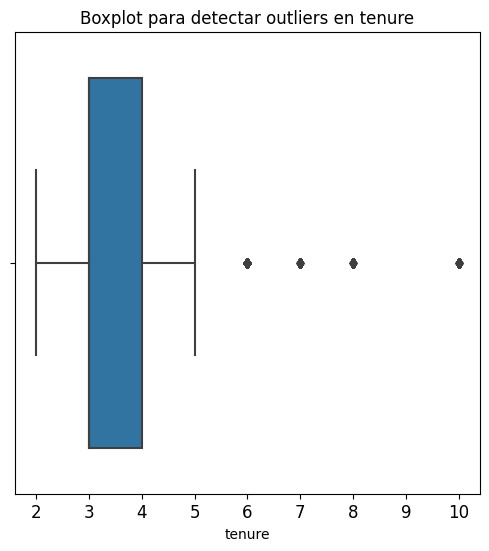

In [406]:
# Crear un boxplot para visualizar la distribución de 'tenure' (antigüedad) y detectar outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot para detectar outliers en tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [407]:


# Calcular percentil 25
percentile25 = df1['tenure'].quantile(0.25)

# Calcular percentil 75
percentile75 = df1['tenure'].quantile(0.75)

# Calcular rango intercuartílico (IQR)
iqr = percentile75 - percentile25

# Definir límites superior e inferior
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identificar subconjunto de datos con outliers
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Contar cuántas filas tienen outliers
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [408]:
# Obtener números de personas que se fueron vs se quedaron

print(df1['left'].value_counts())
print()

# Obtener porcentajes

print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

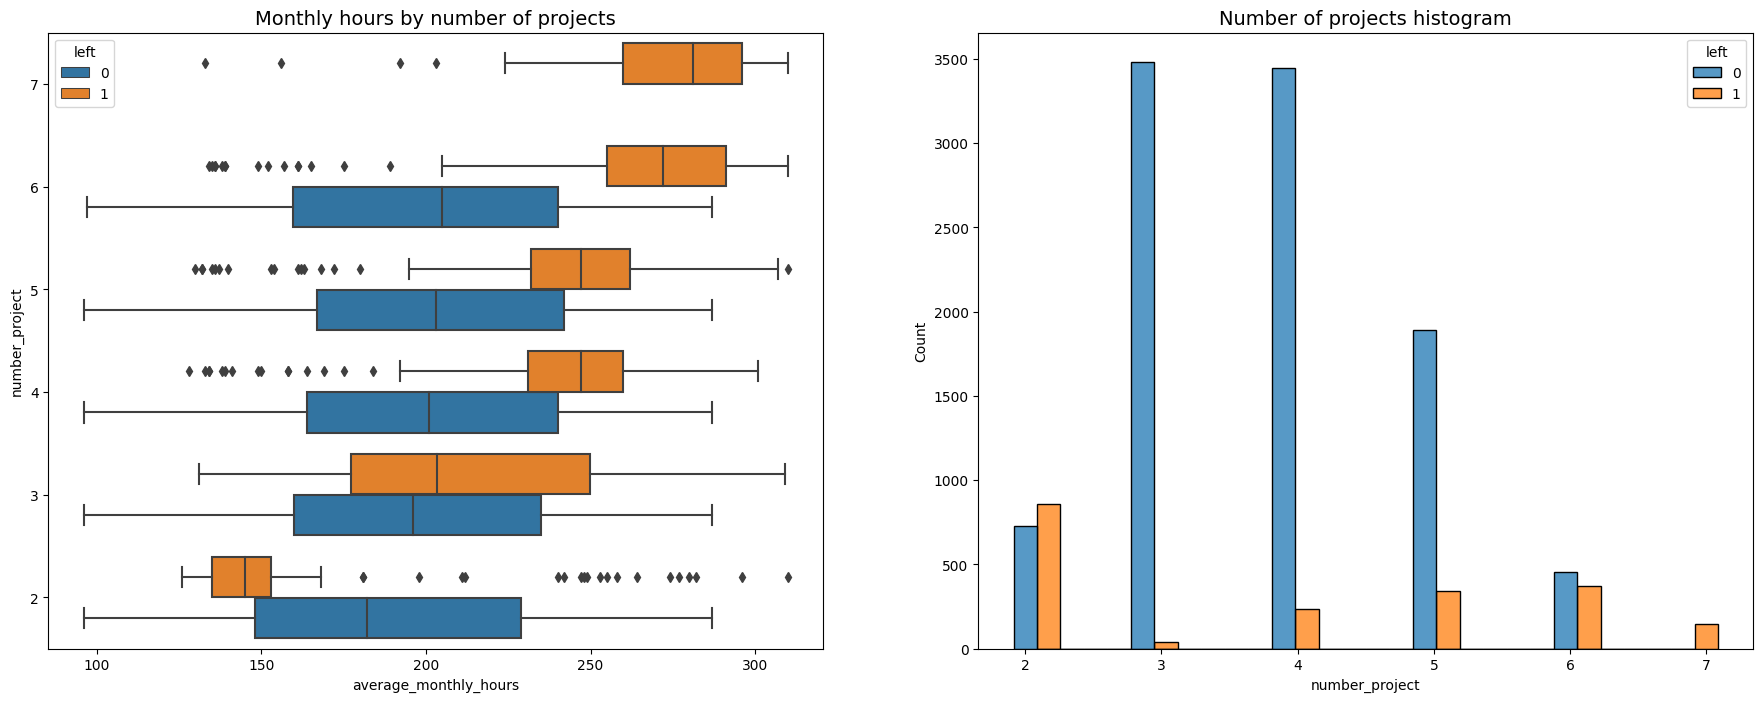

In [409]:


# Configurar figura y ejes
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Boxplot: Horas mensuales vs Número de proyectos (comparando los que se fueron vs se quedaron)
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')


# Histograma: Distribución de número de proyectos (comparando left vs stayed)
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')


plt.show()

In [410]:
# Obtener conteo de valores para empleados con 7 proyectos
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

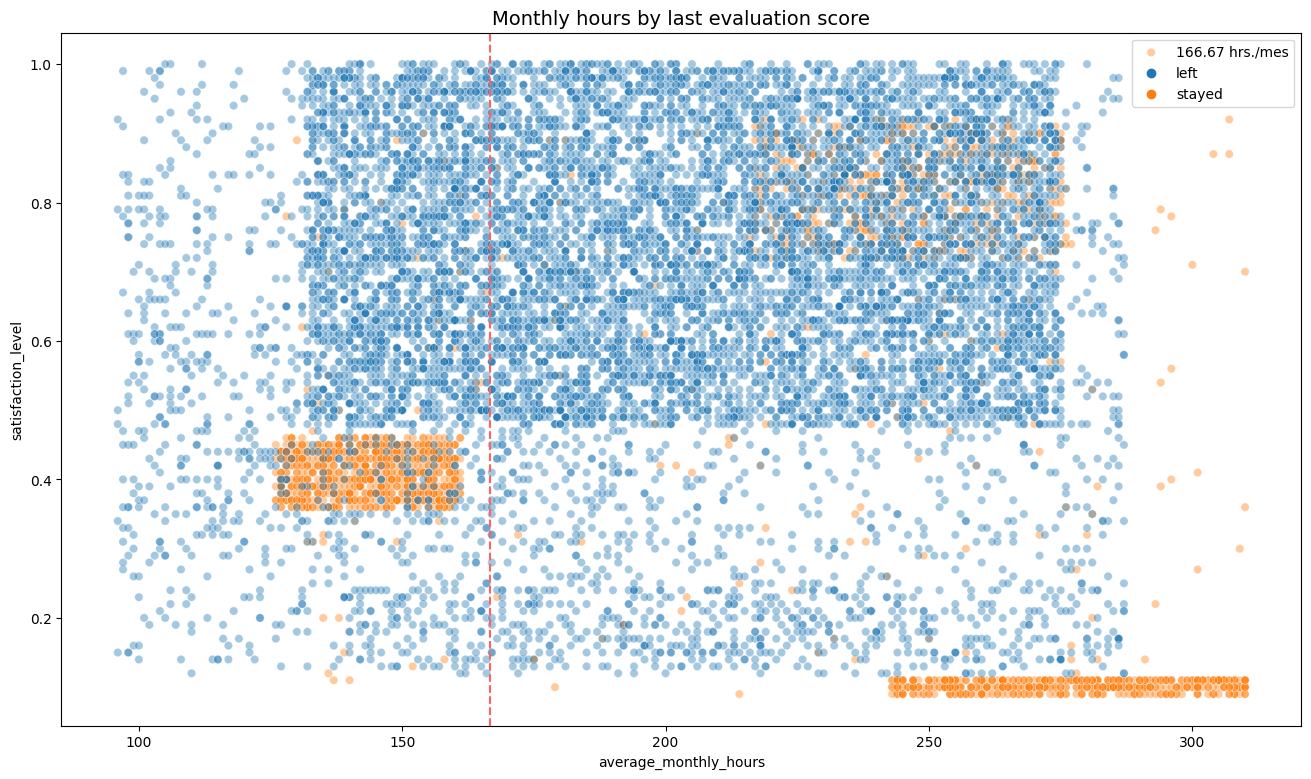

In [411]:
# Scatterplot: Horas mensuales vs Satisfacción
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mes', ls='--')
plt.legend(labels=['166.67 hrs./mes', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

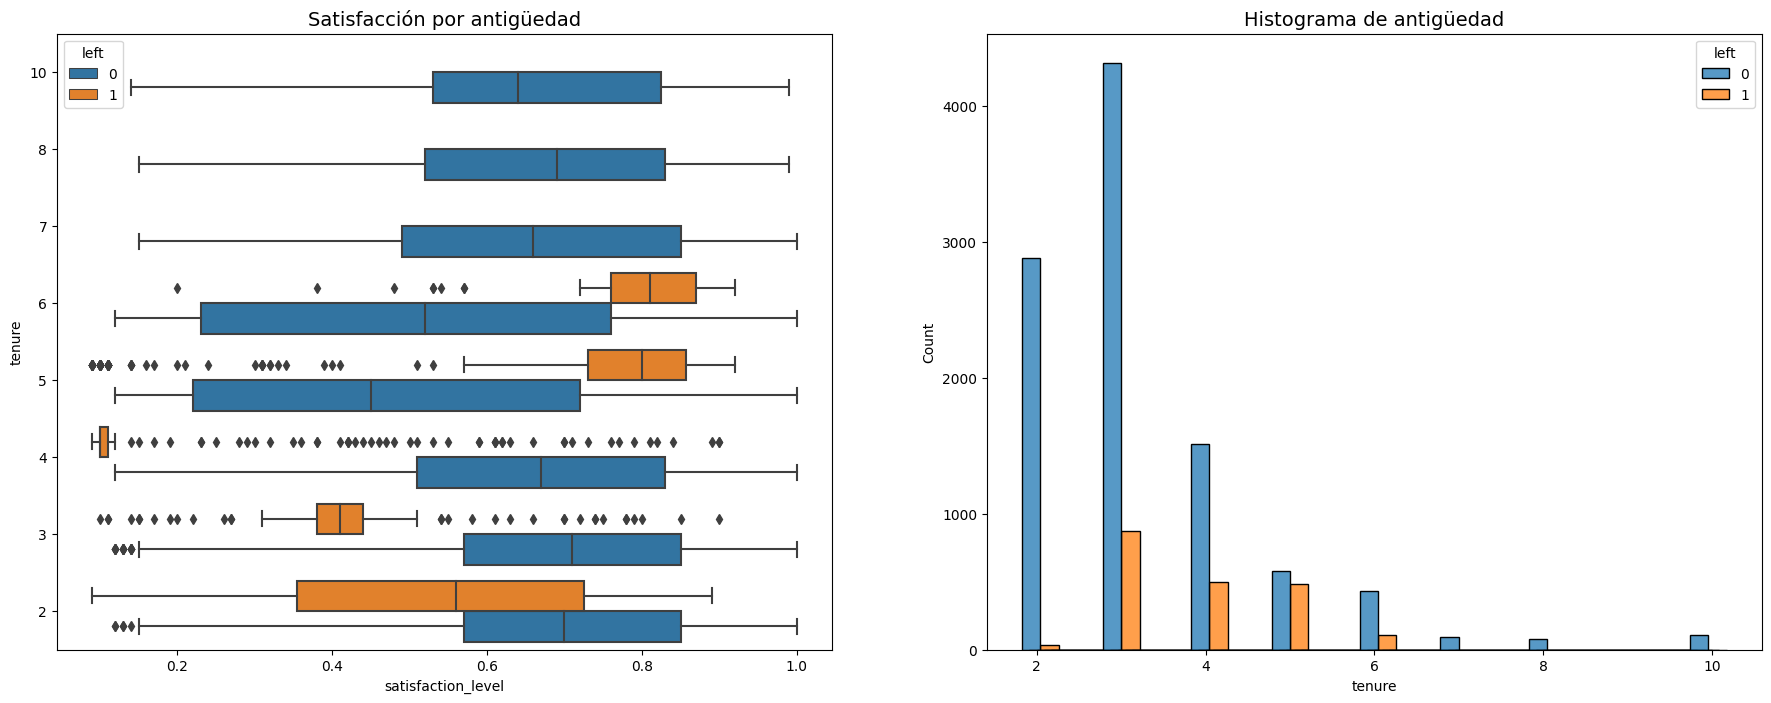

In [412]:
# Visualización: Satisfacción vs Antigüedad (Tenure)
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Boxplot
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfacción por antigüedad', fontsize='14')

# Histograma de antigüedad
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Histograma de antigüedad', fontsize='14')
plt.show();

In [413]:
# Calcular media y mediana de satisfacción
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

/tmp/ipykernel_47/1427712004.py:2: FutureWarning: The provided callable <function mean at 0x7fde30775580> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])
/tmp/ipykernel_47/1427712004.py:2: FutureWarning: The provided callable <function median at 0x7fde306add00> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

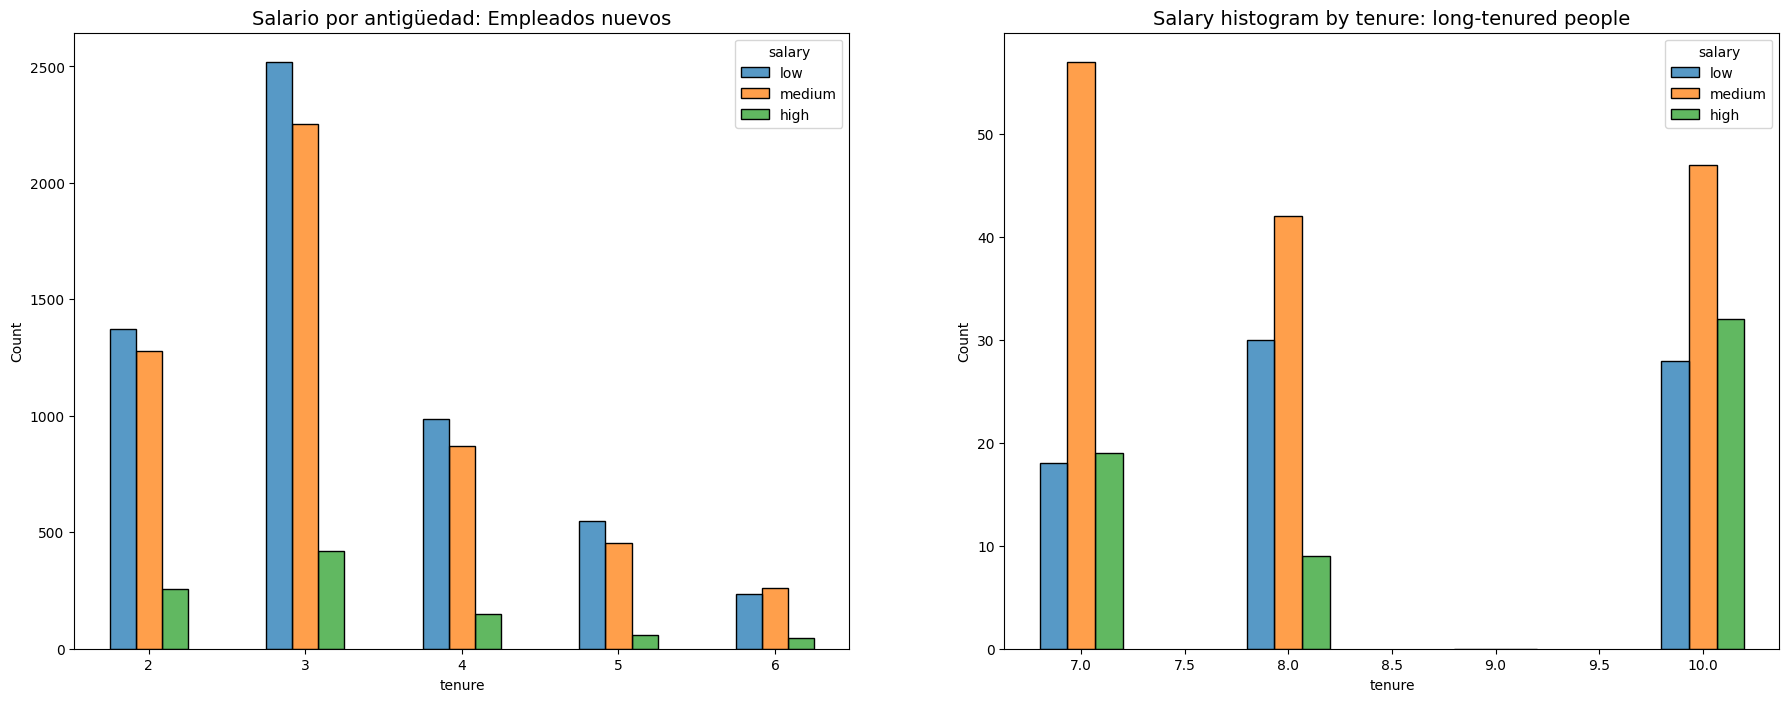

In [414]:
# Histogramas de Salario por Antigüedad (Corta vs Larga)
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Definir empleados de corta y larga antigüedad
tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]

# Plot corta estancia
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salario por antigüedad: Empleados nuevos', fontsize='14')

# Plot larga estancia
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

Text(0.5, 1.0, 'Horas mensuales según la última evaluación')

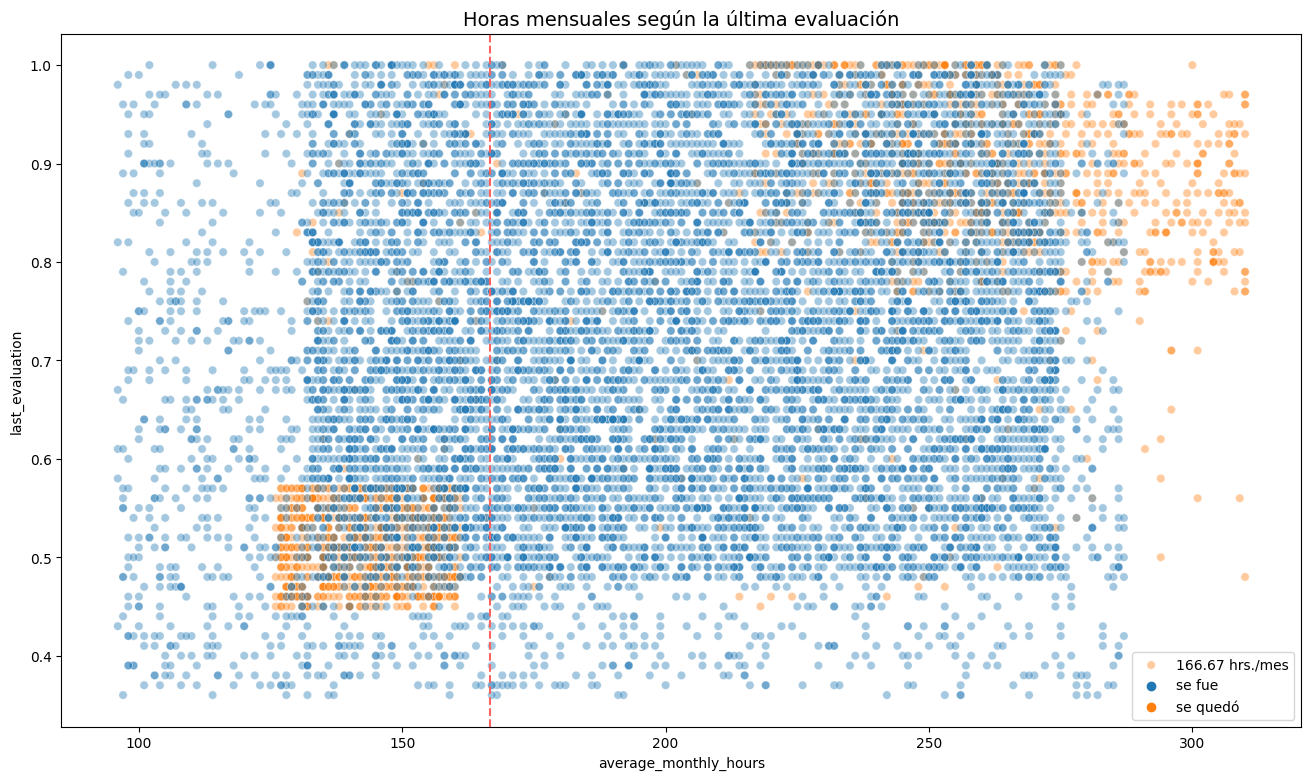

In [415]:

# Crear un diagrama de dispersión de `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation',
                hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mes', ls='--')
plt.legend(labels=['166.67 hrs./mes', 'se fue', 'se quedó'])
plt.title('Horas mensuales según la última evaluación', fontsize=14)


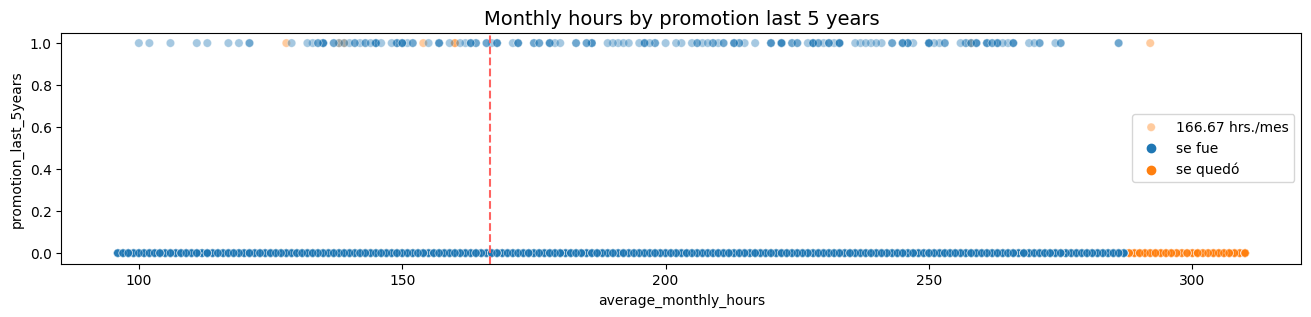

In [416]:

# Crear un gráfico para examinar la relación entre `average_monthly_hours` y `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years',
                hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mes', 'se fue', 'se quedó'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

In [417]:
# Mostrar los conteos de cada departamento
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 45

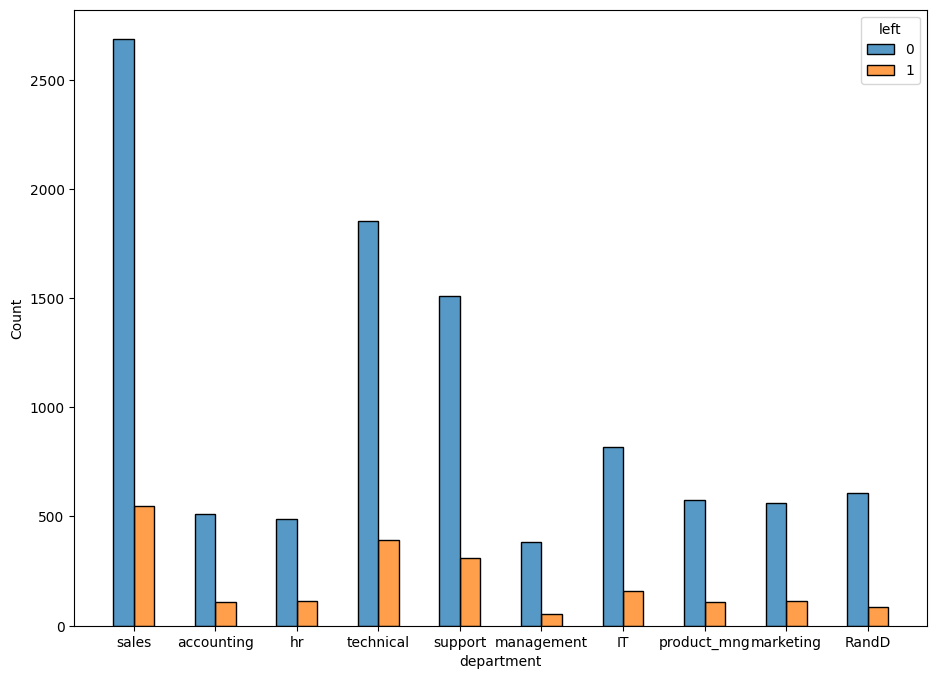

In [418]:
# Crear un histograma para comparar la distribución por departamento de los empleados que se fueron frente a los que no
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

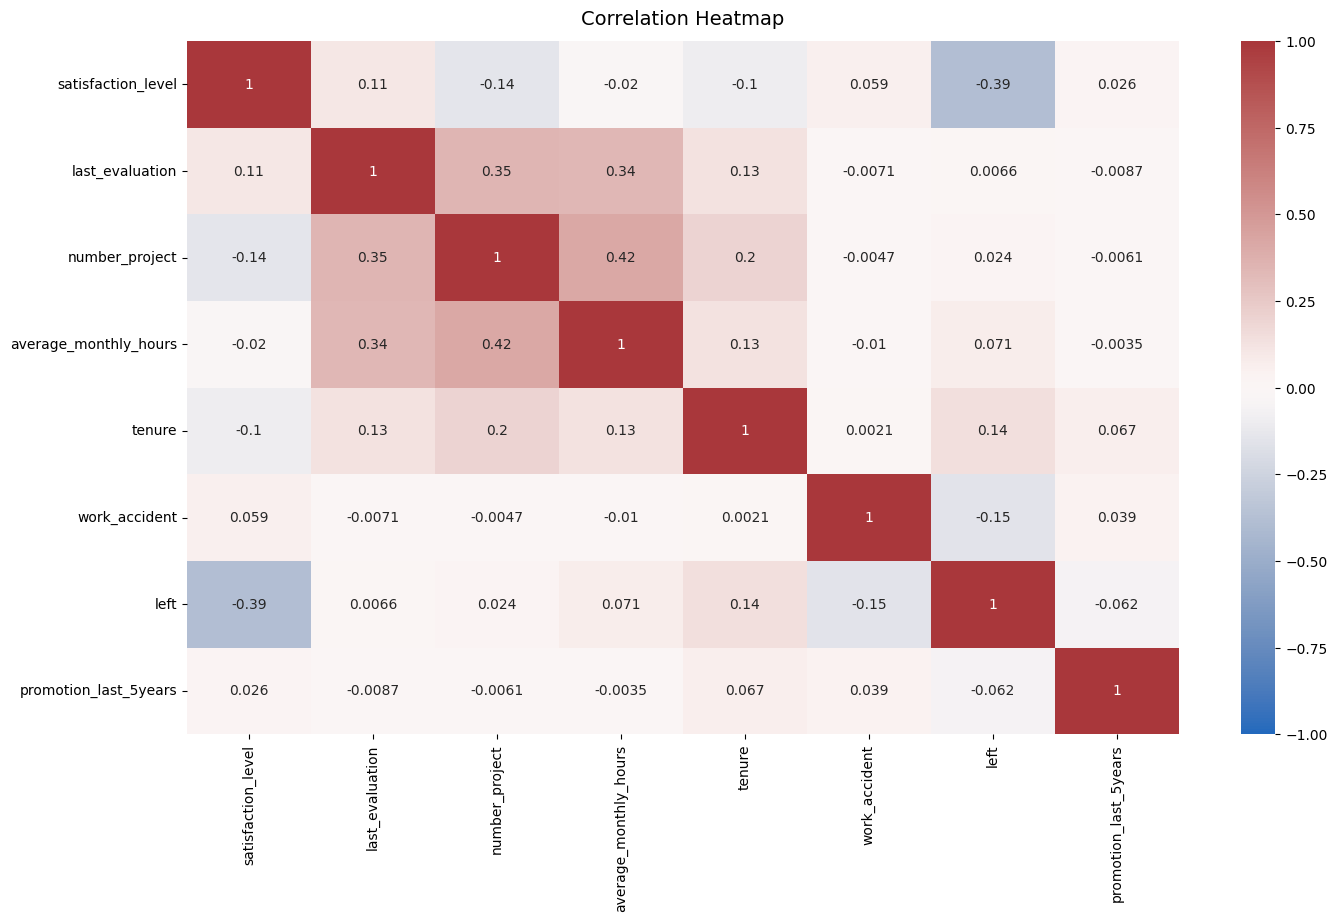

In [427]:


# Trazar un mapa de calor de correlación
plt.figure(figsize=(16, 9))

# Nota: Se agrega numeric_only=True para evitar errores con columnas de texto
heatmap = sns.heatmap(df0.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, 
                      cmap=sns.color_palette("vlag", as_cmap=True))

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
plt.show()

**ETAPA CONSTRUIR (C=(Construct)**

 A: Logistic Regression Model

In [428]:
# Copiar el dataframe
df_enc = df1.copy()

# Codificar la columna 'salary' (salario) como una categoría numérica ordinal
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Codificar la columna 'department' con variables ficticias (dummy encoding)
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Mostrar las primeras filas del nuevo dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


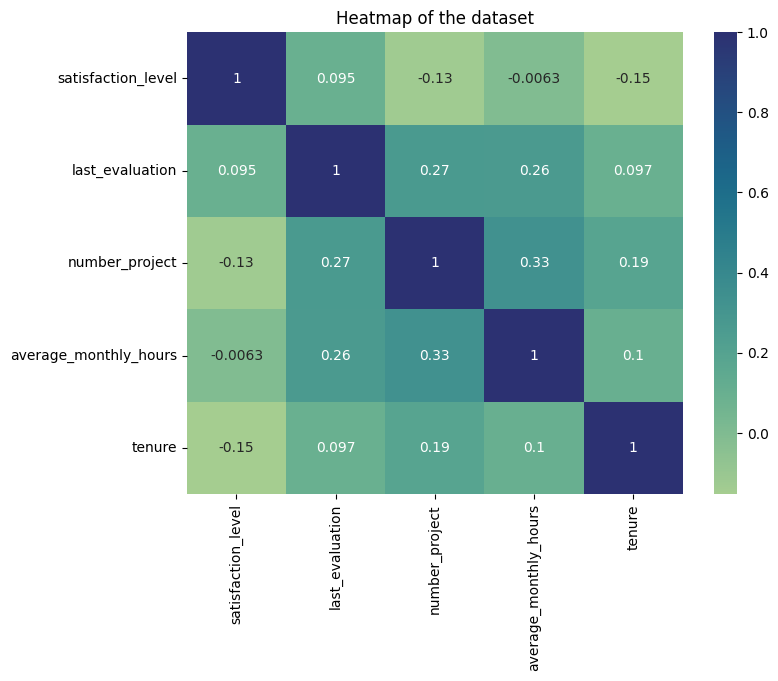

In [429]:
# Crear un mapa de calor para visualizar qué tan correlacionadas están las variables
plt.figure(figsize=(8, 6))

# Nota: He unido la lista de columnas que estaba cortada
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 
                    'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")

plt.title('Heatmap of the dataset')
plt.show()

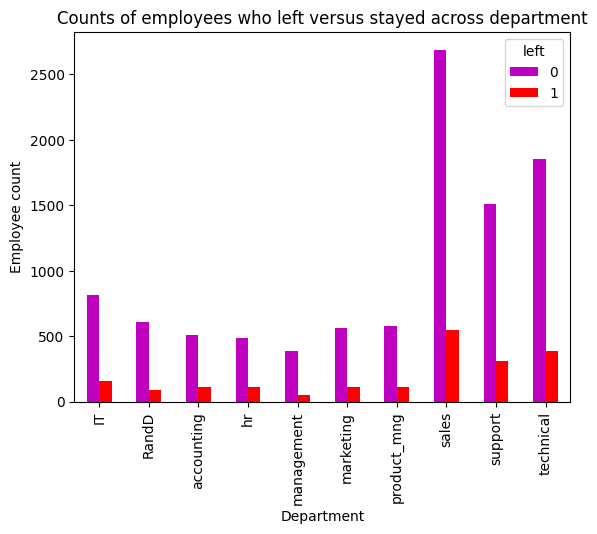

In [430]:
# Crear un gráfico de barras apilado para visualizar el número de empleados por 
# departamento, comparando los que se fueron con los que no.
# En la leyenda, 0 (color morado/magenta) representa a los empleados que no se fueron, 
# 1 (color rojo) representa a los empleados que se fueron.

pd.crosstab(df1['department'], df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [431]:
# Seleccionar filas sin valores atípicos en 'tenure' y guardar el dataframe resultante en una nueva variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Mostrar las primeras filas del nuevo dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Aísla la variable objetivo, que es la variable que deseas que tu modelo prediga

In [432]:
# Aislar la variable objetivo (target)
y = df_logreg['left']

# Mostrar las primeras filas de la variable objetivo
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Selecciona las características que deseas usar en tu modelo. Considera qué variables te ayudarán a predecir la variable objetivo, left.

In [433]:
# Seleccionar las características (features) que deseas usar en tu modelo
X = df_logreg.drop('left', axis=1)

# Mostrar las primeras filas de las características seleccionadas
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba. No olvidar estratificar según los valores de y, ya que las clases están desbalanceadas.

In [434]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Construir un modelo de regresión logística y ajústarlo al conjunto de entrenamiento.

In [435]:
# Construir un modelo de regresión logística y ajustarlo al conjunto de datos de entrenamiento
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Prueba el modelo de regresión logística: utiliza el modelo para hacer predicciones sobre el conjunto de prueba.

In [437]:
# Usar el modelo de regresión logística para obtener predicciones en el conjunto de prueba
y_pred = log_clf.predict(X_test)

Crea una matriz de confusión para visualizar los resultados del modelo de regresión logística.

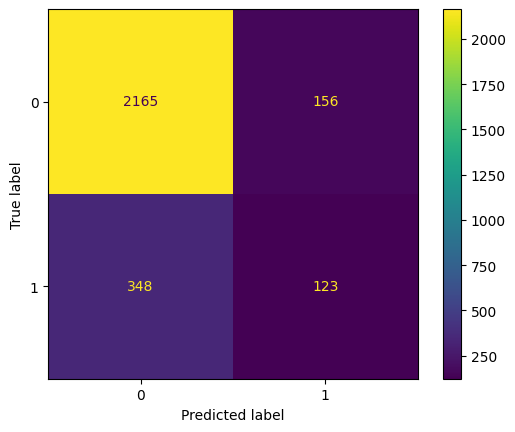

In [438]:
# Calcular los valores para la matriz de confusión
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Crear la visualización de la matriz de confusión
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Graficar la matriz de confusión
log_disp.plot(values_format='')

# Mostrar el gráfico
plt.show()

In [439]:
# Obtener los conteos de valores para la variable 'left' normalizados (como proporciones)
# Esto muestra el porcentaje de empleados que se fueron vs. los que se quedaron en este conjunto de datos filtrado
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [440]:
# Crear reporte de clasificación para el modelo de regresión logística
target_names = ['Predicho que no se iría', 'Predicho que se iría']
print(classification_report(y_test, y_pred, target_names=target_names))

                         precision    recall  f1-score   support

Predicho que no se iría       0.86      0.93      0.90      2321
   Predicho que se iría       0.44      0.26      0.33       471

               accuracy                           0.82      2792
              macro avg       0.65      0.60      0.61      2792
           weighted avg       0.79      0.82      0.80      2792



Accuracy  : 0.8200   → 82 % de predicciones correctas en total
Precision : 0.4400   → cuando digo "se va", acierto solo el 44 %
Recall    : 0.2600   → solo detecto al 26 % de los que realmente se van
F1-score  : 0.3300   → balance bajo porque el recall es muy bajo


**Predictive HR Analytics | Salifort Motors**

Objective
The goal of this project is to develop a data-driven predictive tool to identify employees at high risk of leaving Salifort Motors, helping the organization implement targeted retention strategies and reduce the financial and operational costs associated with employee turnover.

| Criterion              | Result                                                   |
| ---------------------- | -------------------------------------------------------- |
| Model Type             | Logistic Regression (interpretable classification model) |
| Overall Accuracy       | 82%                                                      |
| F1-Score (Churn Class) | 0.33                                                     |


**Conclusion**

The baseline logistic regression model achieves an overall accuracy of 82%. However, its recall for the minority class (employees who leave the company) is only 26%, which is a common limitation when working with highly imbalanced datasets.

While the model is fast and interpretable, this level of recall would be insufficient for production use. In a real-world setting, more powerful models such as Random Forest or XGBoost, combined with class imbalance handling techniques, would be recommended to improve churn detection without excessively sacrificing overall precision.